# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [10]:
# Importando bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Carregando a base de dados e plotando a tabela para verificação

df_imoveis = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')
df_imoveis.head(5)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0


In [12]:
# Transformando o X e o Y, escolhendo o X como "Metragem" por geralmente possuir uma correlação maior com o valor do Aluguel

y = df_imoveis['Valor_Aluguel']
X = df_imoveis[['Metragem']]

# 2 - Faça o processamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [17]:
# Processando os dados com o Polynomial Feature apenas na variável X

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(X)

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [19]:
# Separando em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

# Treinando o modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Verificando o tamanho das variáveis
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_test: (1441, 3)
Tamanho de y_test: (1441,)


# 4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

R² da Regressão Polinomial: 0.5423


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


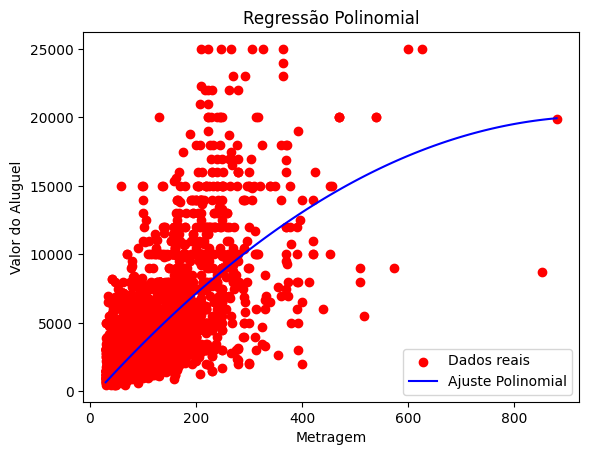

In [20]:
# Realizando previsões

y_pred = model.predict(x_test)

# Plotando o R2 para entender o modelo e para comparação futura
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

# Sequência de valores X para a visualização, buscando a suavização (copiado da aula)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

# Avaliação do modelo:

O modelo trouxe um resultado mediano (54%), visto que está sendo utilizada apenas uma única variável, demonstrando que metade da variação ficou sem explicação.

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

Tamanho de x_test: (1441, 5)
Tamanho de y_test: (1441,)
R² da Regressão Polinomial elevado a 4: 0.5596


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


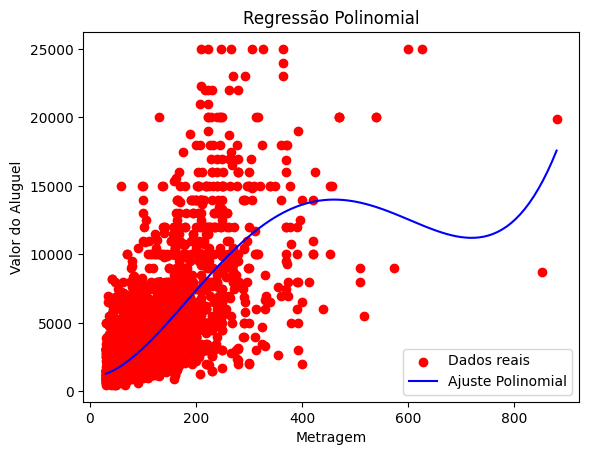

In [33]:
# Processando os dados com o Polynomial Feature, mas dessa vez com degree=4

poly_features2 = PolynomialFeatures(degree=4)
x_poly2 = poly_features2.fit_transform(X)

# Separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_poly2, y, test_size=0.2, random_state=0)

# Treinando o modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Verificando o tamanho das variáveis
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

# Realizando previsões
y_pred2 = model.predict(x_test)

# Plotando o R2 para entender o modelo e para comparação futura
r2 = r2_score(y_test, y_pred2)
print(f'R² da Regressão Polinomial elevado a 4: {r2:.4f}')

# Sequência de valores X para a visualização, buscando a suavização (copiado da aula)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features2.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

# Avaliação

Sim, o modelo com grau 4 apresentou desempenho ligeiramente superior, com R² de 0.5596 (56%) e um ajuste visual mais aderente aos dados, captando melhor suas variações.

Ps: Fiz o teste apenas alterando o grau por curiosidade, mas sem deixar de forma fixa no relatório. Ao elevar ao quinto grau, o r² cai ligeiramente, enquanto que ao elevar ao sexto grau, é obtido o melhor resultado, mas dai em diante, o resultado apenas piora conforme aumentamos o degree.

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

- Lasso: Pode zerar alguns coeficientes, eliminando variáveis menos relevantes. Ajuda na seleção de variáveis e facilita a interpretação, por deixá-la mais simples.
- Ridge: Reduz os coeficientes, mas nunca os elimina completamente. Importante quando se tem mais de uma variável com correlação forte, deixando o modelo mais robusto e generalizando melhor com dados novos.
- Elas Net: É a combinação entre os modelos anteriores. Reduz a apenas variáveis importantes durante a seleção e generaliza o restante, deixando o modelo mais robusto.